In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart_disease.csv')

In [3]:
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [5]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
e=df.corr()

In [10]:
e['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

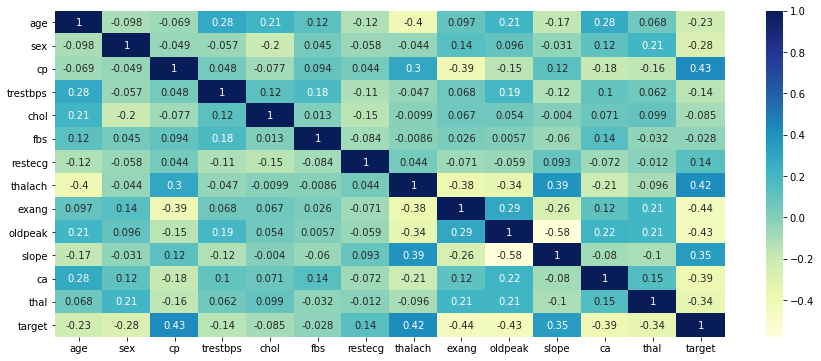

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(e,annot=True, cmap="YlGnBu")

<AxesSubplot:>

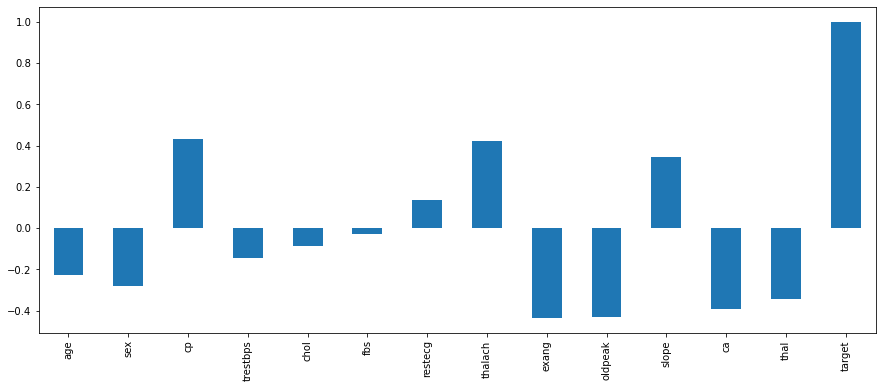

In [12]:
e['target'].plot(kind='bar', figsize=(15,6))

In [20]:
# Feature selection by ANOVA
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
X=df.drop('target', axis=1)
y=df.target 
best_features= SelectKBest(score_func=f_classif, k=11)
fit= best_features.fit(X,y)
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns= ['Feature_name', 'Score']
print (feature_scores.nlargest (12, 'Score'))

   Feature_name      Score
8         exang  70.952438
2            cp  69.772271
9       oldpeak  68.551439
7       thalach  65.120104
11           ca  54.559834
10        slope  40.902071
12         thal  40.407696
1           sex  25.792191
0           age  16.116700
3      trestbps   6.458169
6       restecg   5.777209
4          chol   2.202983


In [14]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [16]:
X=df.drop('target', axis=1)
y=df.target
sp=SelectPercentile(score_func=chi2, percentile=80)
sp=sp.fit(X,y)
cols=sp.get_support(indices=True)
print('Feature index =', cols)

features=X.columns[cols]
print('Features =', list(features))

Feature index = [ 0  1  2  3  4  7  8  9 10 11]
Features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [19]:
df1=pd.DataFrame({'features': X.columns, 'Chi2Score':sp.scores_, 'pValue':sp.pvalues_})
df1.sort_values(by='Chi2Score', ascending=False)

,features,Chi2Score,pValue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [22]:
# Create subset of features
X=df[features]
y=df.target

In [25]:
from sklearn.preprocessing import StandardScaler
s= StandardScaler()
X_scaler=s.fit_transform(X)
X_train, X_test, y_train, y_test= train_test_split(X_scaler, y, test_size=0.3, random_state=49)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [41]:
gc=GradientBoostingClassifier()
gc.fit(X_train,y_train)

GradientBoostingClassifier()

In [42]:
pred=gc.predict(X_test)

In [43]:
confusion_matrix(pred,y_test)

array([[34,  4],
       [15, 38]], dtype=int64)

In [44]:
accuracy_score(pred,y_test)

0.7912087912087912

In [45]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78        38
           1       0.90      0.72      0.80        53

    accuracy                           0.79        91
   macro avg       0.80      0.81      0.79        91
weighted avg       0.82      0.79      0.79        91



In [46]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_pa={'max_depth' : range(4,8),
         'min_samples_split': range(2,8),
         'learning_rate':np.arange(0.1,0.3)}

In [59]:
g=GridSearchCV(estimator=gc, param_grid=grid_pa)

In [60]:
g.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8)})

In [61]:
g.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 3}

In [62]:
gc1=GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_split=3)

In [63]:
gc1.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=3)

In [64]:
pred=gc.predict(X_test)

In [65]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.89      0.78        38
           1       0.90      0.72      0.80        53

    accuracy                           0.79        91
   macro avg       0.80      0.81      0.79        91
weighted avg       0.82      0.79      0.79        91

